In [ ]:
install.packages("GGally")

In [14]:
library(tidyverse)
library(caret)
library(repr)
library(GGally)


Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



| Numerical/quantitative data | Nominal/Qualitative data|
------------------------------|-----------------|
|age **(age)**                     |specific gravity **(sg)**|
|blood pressure **(bp)**           |albumin **(al)**|
|blood glucose random **(bgr)**    |sugar **(su)**|
|blood urea **(bu)**               |red blood cells **(rbc)**|
|serum creatinine **(sc)**         |pus cell **(pc)**|
|sodium **(sd)**                   |pus cell clumps **(pcc)**|
|potassium **(pot)**               |bacteria **(ba)**|
|hemoglobin **(hemo)**             |hypertension **(htn)**|
|packed cell volume **(pcv)**      |diabetes mellitus **(dm)**|
|white blood cell count **(wbcc)** |coronary artery disease **(cad)**|
|red blood cell count **(rbcc)**   |appetite **(appet)**|
|NA                           |pedal edema **(pe)**|
|NA                           |anemia **(ane)**|
|NA                           |**class**|

In [2]:
kidney <- read_csv("https://raw.githubusercontent.com/UBC-DSCI/datasets/master/chronic_kidney_disease/chronic_kidney_disease_full.csv")
head(kidney)

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_integer(),
  bp = col_integer(),
  sg = col_double(),
  al = col_integer(),
  su = col_integer(),
  bgr = col_integer(),
  bu = col_double(),
  sc = col_double(),
  sod = col_double(),
  pot = col_double(),
  hemo = col_double(),
  pcv = col_integer(),
  wbcc = col_double(),
  rbcc = col_double()
)
See spec(...) for full column specifications.


age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,⋯,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
48,80,1.020,1,0,NA,normal,notpresent,notpresent,121,⋯,44,7800,5.2,yes,yes,no,good,no,no,ckd
7,50,1.020,4,0,NA,normal,notpresent,notpresent,NA,⋯,38,6000,NA,no,no,no,good,no,no,ckd
62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,⋯,31,7500,NA,no,yes,no,poor,no,yes,ckd
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,⋯,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,⋯,35,7300,4.6,no,no,no,good,no,no,ckd
60,90,1.015,3,0,NA,NA,notpresent,notpresent,74,⋯,39,7800,4.4,yes,yes,no,good,yes,no,ckd


In [73]:
kidney_quantitative_scaled_1 <- kidney %>%
    select(age, bp, bgr, bu) %>%
    scale(center = FALSE)#%>%
    #data.frame() %>%
   #bind_cols(class)

for(i in 1:ncol(kidney_quantitative_scaled_1)){
  kidney_quantitative_scaled_1[is.na(kidney_quantitative_scaled_1[,i]), i] <- mean(kidney_quantitative_scaled_1[,i], na.rm = TRUE)
}

head(kidney_quantitative_scaled_1)

kidney_quantitative_scaled_1 <- data.frame(kidney_quantitative_scaled_1)

age,bp,bgr,bu
0.8834323,1.0285299,0.7197520,0.4703996
0.1288339,0.6428312,0.8805751,0.2351998
1.1411000,1.0285299,2.5161580,0.6925327
0.8834323,0.8999637,0.6959586,0.7317327
0.9386468,1.0285299,0.6305266,0.3397330
1.1042903,1.1570962,0.4401789,0.3266664


      age                bp              bgr               bu        
 Min.   :0.03681   Min.   :0.6428   Min.   :0.1309   Min.   :0.0196  
 1st Qu.:0.77300   1st Qu.:0.9000   1st Qu.:0.6008   1st Qu.:0.3528  
 Median :0.99386   Median :1.0058   Median :0.7495   Median :0.5749  
 Mean   :0.94754   Mean   :0.9831   Mean   :0.8806   Mean   :0.7504  
 3rd Qu.:1.17791   3rd Qu.:1.0285   3rd Qu.:0.8923   3rd Qu.:0.8069  
 Max.   :1.65644   Max.   :2.3142   Max.   :2.9147   Max.   :5.1091  

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins 

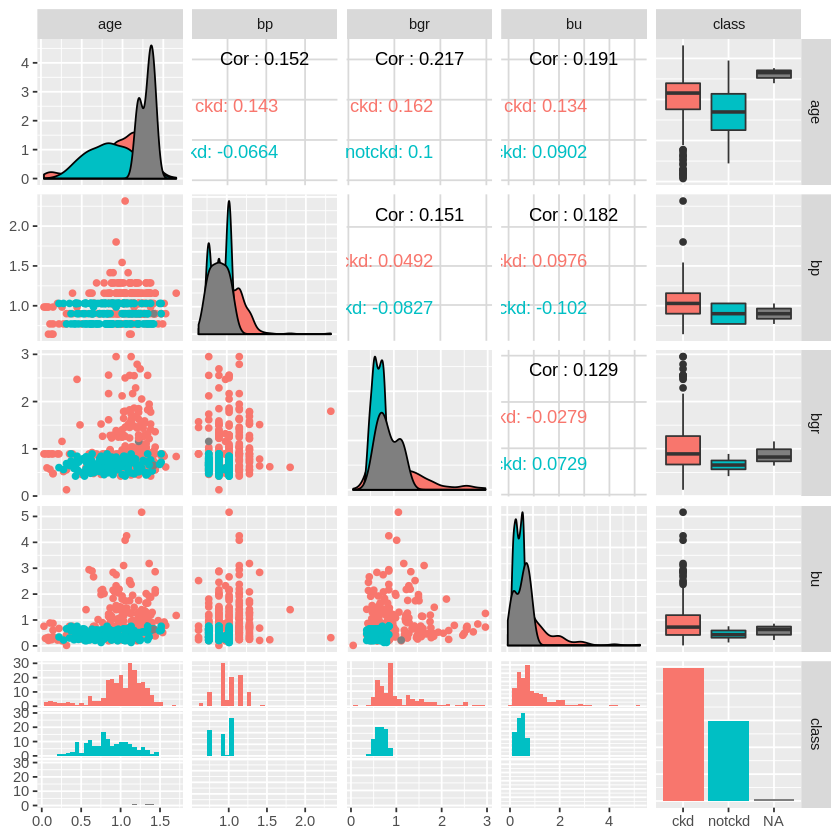

In [75]:
class <- kidney %>%
    select(class)
#head(class)

kidney_quantitative_scaled_1 <- kidney_quantitative_scaled_1 %>%
    select(age, bp, bgr, bu) %>%
    scale(center = FALSE) %>%
    data.frame() %>%
    bind_cols(class)

ggpairs(kidney_quantitative_scaled_1, mapping = ggplot2::aes(colour = class))

In [74]:
kidney_quantitative_scaled_2 <- kidney %>%
    select(sc,pot,hemo,pcv) %>%
    scale(center = FALSE) #%>%
    #data.frame() %>%
    #bind_cols(class)

for(i in 1:ncol(kidney_quantitative_scaled_2)){
  kidney_quantitative_scaled_2[is.na(kidney_quantitative_scaled_2[,i]), i] <- mean(kidney_quantitative_scaled_2[,i], na.rm = TRUE)
}

head(kidney_quantitative_scaled_2)
kidney_quantitative_scaled_2 <- data.frame(kidney_quantitative_scaled_2)

sc,pot,hemo,pcv
0.1842338,0.8220934,1.1958231,1.1011476
0.1228225,0.8220934,0.8774546,0.9509911
0.2763506,0.8220934,0.7454482,0.7758086
0.5834069,0.4441594,0.8696895,0.8008346
0.2149394,0.8220934,0.9007499,0.8759129
0.1688809,0.5685240,0.9473404,0.9760172


Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins 

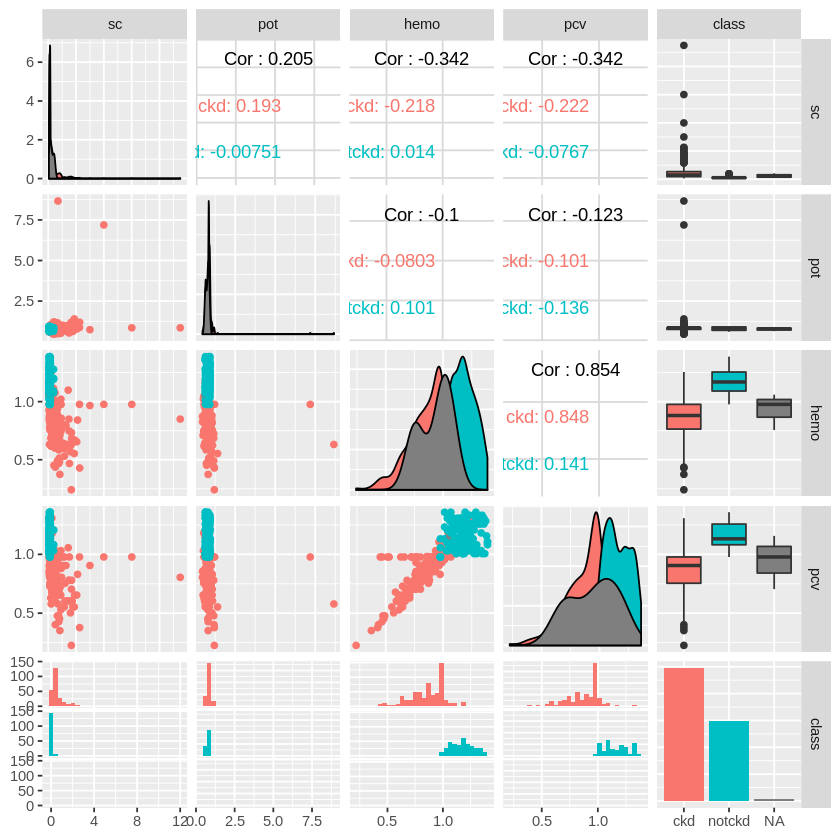

In [76]:
kidney_quantitative_scaled_2 <- kidney_quantitative_scaled_2 %>%
    select(sc,pot,hemo,pcv) %>%
    scale(center = FALSE) %>%
    data.frame() %>%
    bind_cols(class)

ggpairs(kidney_quantitative_scaled_2, mapping = ggplot2::aes(colour = class))

In [77]:
kidney_quantitative_scaled_3 <- kidney %>%
    select(wbcc, rbcc) %>%
    scale(center = FALSE) #%>%
    #data.frame() %>%
    #bind_cols(class)

for(i in 1:ncol(kidney_quantitative_scaled_3)){
  kidney_quantitative_scaled_3[is.na(kidney_quantitative_scaled_3[,i]), i] <- mean(kidney_quantitative_scaled_3[,i], na.rm = TRUE)
}

head(kidney_quantitative_scaled_3)
kidney_quantitative_scaled_3 <- data.frame(kidney_quantitative_scaled_3)

wbcc,rbcc
0.8734525,1.0774127
0.6718865,0.9753558
0.8398581,0.9753558
0.7502733,0.8080595
0.8174619,0.9530958
0.8734525,0.9116569


Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


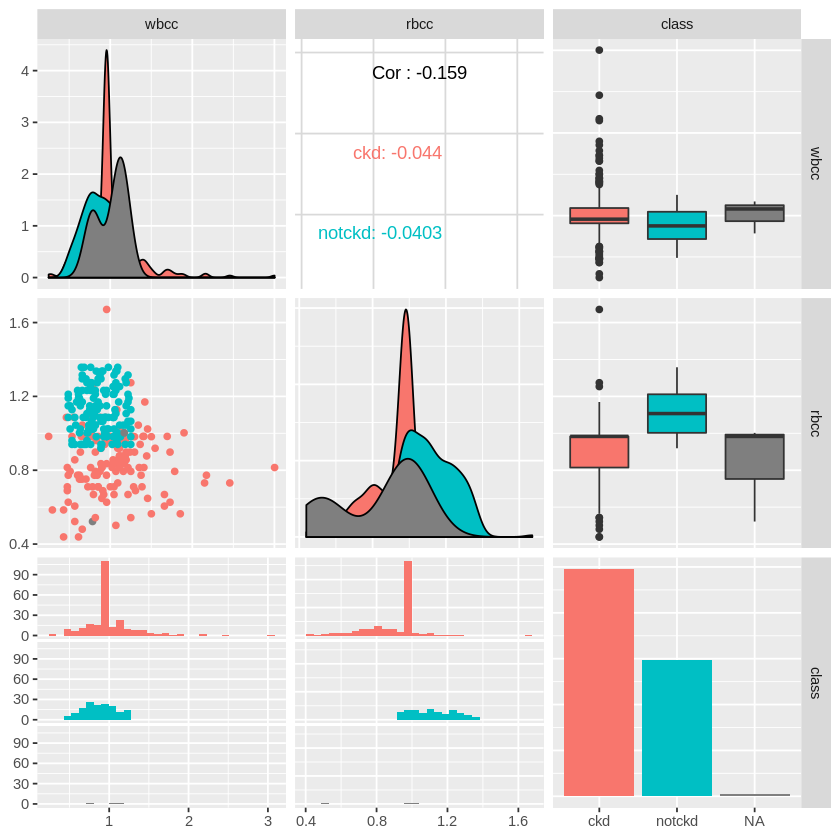

In [79]:
kidney_quantitative_scaled_3 <- kidney_quantitative_scaled_3 %>%
      select(wbcc, rbcc) %>%
      scale(center = FALSE) %>%
      data.frame() %>%
      bind_cols(class)

ggpairs(kidney_quantitative_scaled_3, mapping = ggplot2::aes(colour = class))

In [84]:
# One hot encoding
kidney_categorical <- kidney %>%
    data.frame() %>%
    select(rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane)

head(kidney_categorical)

dummyvar <- dummyVars("~ .", data = kidney_categorical)
kidney_onehot <- data.frame(predict(dummyvar, newdata = kidney_categorical))

head(kidney_onehot)

rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
NA,normal,notpresent,notpresent,yes,yes,no,good,no,no
NA,normal,notpresent,notpresent,no,no,no,good,no,no
normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
normal,normal,notpresent,notpresent,no,no,no,good,no,no
NA,NA,notpresent,notpresent,yes,yes,no,good,yes,no


rbcabnormal,rbcnormal,pcabnormal,pcnormal,pccnotpresent,pccpresent,banotpresent,bapresent,htnno,htnyes,dmno,dmyes,cadno,cadyes,appetgood,appetpoor,peno,peyes,aneno,aneyes
NA,NA,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
NA,NA,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1
0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1
0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
NA,NA,NA,NA,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0
